In [1]:
#DATS 6103 - Individual Project 2 - Pradip Hayu

# Load required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.plotly as py
#Sign in into plotly
py.sign_in('pradip_hayu','FXtESPzu80UQxz8FmOFz')
print(plotly.__version__)
plotly.offline.init_notebook_mode()
import plotly.graph_objs as go

3.4.1


In [2]:
# Read the "GDP Per Capita(current US $)" Excel spreadsheet which was obtained from the website: 
#https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
#Set Country Name as the Index, skip the first three rows from the header, and fill the empty values with 0
IncomePP = pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_10181000.xls', index_col = 0, header = 3).fillna(0)
IncomePP.head()

Country Code                Indicator Name  Indicator Code  \
Country Name                                                              
Aruba                 ABW  GDP per capita (current US$)  NY.GDP.PCAP.CD   
Afghanistan           AFG  GDP per capita (current US$)  NY.GDP.PCAP.CD   
Angola                AGO  GDP per capita (current US$)  NY.GDP.PCAP.CD   
Albania               ALB  GDP per capita (current US$)  NY.GDP.PCAP.CD   
Andorra               AND  GDP per capita (current US$)  NY.GDP.PCAP.CD   

                   1960       1961       1962       1963       1964  \
Country Name                                                          
Aruba          0.000000   0.000000   0.000000   0.000000   0.000000   
Afghanistan   59.777327  59.878153  58.492874  78.782758  82.208444   
Angola         0.000000   0.000000   0.000000   0.000000   0.000000   
Albania        0.000000   0.000000   0.000000   0.000000   0.000000   
Andorra        0.000000   0.000000   0.000000   0.000000   0.000000   

                    1965        1966      ...               2008  \
Country Name                              ...                      
Aruba           0.000000    0.000000      ...       27546.899390   
Afghanistan   101.290471  137.899362      ...         373.361116   
Angola          0.000000    0.000000      ...        3868.579014   
Albania         0.000000    0.000000      ...        4370.539647   
Andorra         0.000000    0.000000      ...       47785.659086   

                      2009          2010          2011          2012  \
Country Name                                                           
Aruba         24631.434860  24271.940421  25324.720362      0.000000   
Afghanistan     445.893298    553.300289    603.537023    669.009051   
Angola         3347.844900   3531.416878   4299.008136   4539.467689   
Albania        4114.136545   4094.358832   4437.178068   4247.614308   
Andorra       43339.379875  39736.354063  41098.766942  38391.080867   

                      2013          2014          2015          2016  \
Country Name                                                           
Aruba             0.000000      0.000000      0.000000      0.000000   
Afghanistan     638.612543    629.345250    569.577923    561.778746   
Angola         4804.633826   4707.578098   3683.552607   3308.772828   
Albania        4413.081697   4578.666728   3952.830781   4131.872341   
Andorra       40619.711298  42294.994727  36038.267604  37231.815671   

                      2017  
Country Name                
Aruba             0.000000  
Afghanistan     585.850064  
Angola         4170.312280  
Albania        4537.862492  
Andorra       39146.548836  

[5 rows x 61 columns]

In [3]:
# Create an empty cols array. Use a for loop to get the values from 2010 to 2016.
#(Basically appends 2010, 2011, 2012 all the way upto 2016, also converts into string before appending..)
cols = []
for i in range (2010, 2016+1):
    cols.append(str(i))
IncomePP = IncomePP[cols[:len(cols)]]
IncomePP.head()

2010          2011          2012          2013  \
Country Name                                                           
Aruba         24271.940421  25324.720362      0.000000      0.000000   
Afghanistan     553.300289    603.537023    669.009051    638.612543   
Angola         3531.416878   4299.008136   4539.467689   4804.633826   
Albania        4094.358832   4437.178068   4247.614308   4413.081697   
Andorra       39736.354063  41098.766942  38391.080867  40619.711298   

                      2014          2015          2016  
Country Name                                            
Aruba             0.000000      0.000000      0.000000  
Afghanistan     629.345250    569.577923    561.778746  
Angola         4707.578098   3683.552607   3308.772828  
Albania        4578.666728   3952.830781   4131.872341  
Andorra       42294.994727  36038.267604  37231.815671

In [4]:
# Read the "GDP per capita growth annual %" Excel spreadsheet which was obtained from the website: 
#https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
#Set Country Name as the Index, skip the first three rows from the header, and fill the empty values with 0
EconomicGrowth = pd.read_excel('API_NY.GDP.PCAP.KD.ZG_DS2_en_excel_v2_10181075.xls', index_col = 0, 
                               header = 3).fillna(0)
EconomicGrowth.head()

Country Code                    Indicator Name  \
Country Name                                                  
Aruba                 ABW  GDP per capita growth (annual %)   
Afghanistan           AFG  GDP per capita growth (annual %)   
Angola                AGO  GDP per capita growth (annual %)   
Albania               ALB  GDP per capita growth (annual %)   
Andorra               AND  GDP per capita growth (annual %)   

                 Indicator Code  1960  1961  1962  1963  1964  1965  1966  \
Country Name                                                                
Aruba         NY.GDP.PCAP.KD.ZG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Afghanistan   NY.GDP.PCAP.KD.ZG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Angola        NY.GDP.PCAP.KD.ZG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Albania       NY.GDP.PCAP.KD.ZG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
Andorra       NY.GDP.PCAP.KD.ZG   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

                ...         2008       2009      2010      2011       2012  \
Country Name    ...                                                          
Aruba           ...    -7.003497  -5.746497  0.000000  0.000000   0.000000   
Afghanistan     ...     1.040489  17.951089  5.425968  2.879648  10.750252   
Angola          ...     9.832697  -1.175597 -0.175344  0.230112   1.499648   
Albania         ...     4.560118   4.051449  4.226219  2.826410   1.587602   
Andorra         ...    -9.874045  -4.375955 -5.344257 -3.851846  -0.039744   

                  2013      2014      2015      2016      2017  
Country Name                                                    
Aruba         0.000000  0.000000  0.000000  0.000000  0.000000  
Afghanistan   0.512509 -0.526845 -1.628298 -0.349412  0.071666  
Angola        3.135079  1.117471 -0.471272 -4.098056 -2.561034  
Albania       1.185969  1.985308  2.516853  3.517531  3.936913  
Andorra       2.392514  4.298114  2.404977  2.855529  2.291464  

[5 rows x 61 columns]

In [5]:
#Extract the GDP per capita growth (annual %) for each countries from 2010 to 2016.
cols = []
for i in range (2010, 2016+1):
    cols.append(str(i))
EconomicGrowth = EconomicGrowth[cols[:len(cols)]]
EconomicGrowth.head()

2010      2011       2012      2013      2014      2015  \
Country Name                                                                
Aruba         0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
Afghanistan   5.425968  2.879648  10.750252  0.512509 -0.526845 -1.628298   
Angola       -0.175344  0.230112   1.499648  3.135079  1.117471 -0.471272   
Albania       4.226219  2.826410   1.587602  1.185969  1.985308  2.516853   
Andorra      -5.344257 -3.851846  -0.039744  2.392514  4.298114  2.404977   

                  2016  
Country Name            
Aruba         0.000000  
Afghanistan  -0.349412  
Angola       -4.098056  
Albania       3.517531  
Andorra       2.855529

In [6]:
#Towards the end of the GDP Per Capita(current US $) dataset, there is a row named 'World'. Let's locate it
world_income = IncomePP.loc['World']
world_income

2010     9513.617798
2011    10448.682265
2012    10559.196274
2013    10723.606658
2014    10882.675158
2015    10172.222817
2016    10200.860601
Name: World, dtype: float64

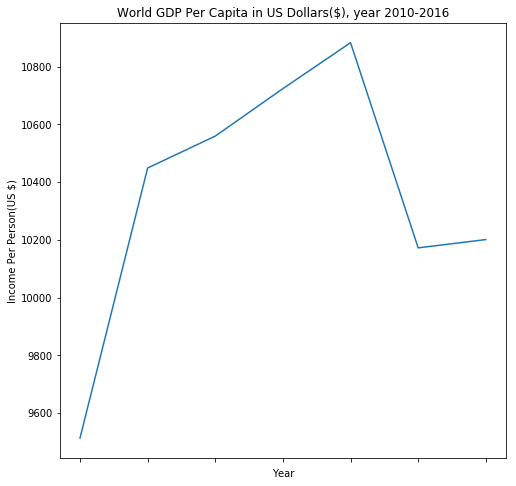

In [7]:
#Let's see the trend of world GDP per capita in US dollars over the years from 2010 to 2016  
world_income.plot(kind = 'line', figsize = (8,8), fontsize = 10,
                 title = 'World GDP Per Capita in US Dollars($), year 2010-2016')
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Income Per Person(US $)', fontsize = 10)
plt.show()

In [8]:
#Towards the end of the GDP per capita growth annual % dataset, there is a row named 'World'. Let's locate it
world_economicgrowth_percent = EconomicGrowth.loc['World']
world_economicgrowth_percent

2010    3.058140
2011    1.973093
2012    1.286949
2013    1.392650
2014    1.636629
2015    1.651378
2016    1.313278
Name: World, dtype: float64

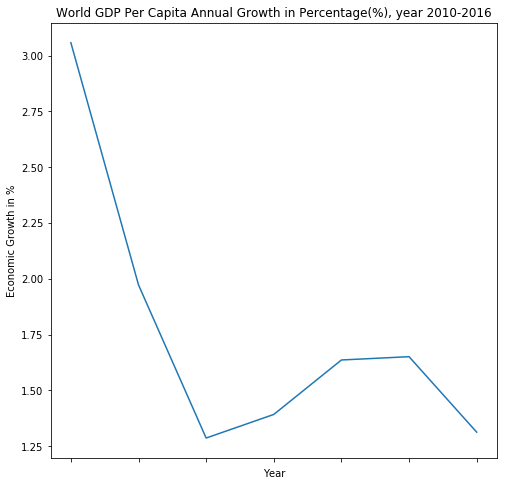

In [9]:
#Let's see the trend of world GDP per capita growth in percentage over the years from 2010 to 2016                                                                                   
world_economicgrowth_percent.plot(kind = 'line',figsize = (8,8), fontsize = 10,
                 title = 'World GDP Per Capita Annual Growth in Percentage(%), year 2010-2016')
plt.xlabel('Year', fontsize = 10)
plt.ylabel('Economic Growth in %', fontsize = 10)
plt.show()


In [10]:
#Constructing a scatter plot to see the relationship between world's income per person(US $) and 
#world's economic growth(%),2010-2016

trace1 = go.Scatter(x = world_income.index, y = world_income, name = 'Income Per Person (US $)')
trace2 = go.Scatter(x = world_economicgrowth_percent.index, y = world_economicgrowth_percent, 
                  name = 'Annual Economic Growth Rate (%)', yaxis='y2')
data = [trace1, trace2]
layout = go.Layout(title = 'Income Per Person(US $) & Economic Growth(%) for the World, 2010-2016'
                  , yaxis = dict(title = 'Income Per Person(US $)'), yaxis2 = dict(title = 'Economic Growth(%)', 
                    titlefont = dict(color = 'rgb(148, 103, 189)'),
                    tickfont = dict(color = 'rgb(148, 103, 189)'),
                    overlaying = 'y', side ='right'))
fig = go.Figure(data = data, layout = layout)
Fig = py.iplot(fig, validate = True, filename ='World Income Per Person & World Economic Growth')
Fig


In [11]:
#Let's use plotly to create a World Choropleth Map to display the Mean Income Per Person (US $), 2010-2016
## Reference: https://plot.ly/python/choropleth-maps/

#Create a new column 'Mean Income Per Person' which is the mean of income per person between 2010 and 2016
IncomePP1 =(pd.read_excel('API_NY.GDP.PCAP.CD_DS2_en_excel_v2_10181000.xls', skiprows = 3,
                          usecols = (0,1,54,55,56,57,58,59,60))).fillna(0)
IncomePP1['Mean Income Per Person'] = IncomePP1.mean(axis = 1)

#Create a new data frame which includes three columns: 'Country Name', 'Mean Income Per Person' & 'Country Code'
df = IncomePP1[['Country Name', 'Mean Income Per Person', 'Country Code']]


data = [dict(type='choropleth', 
             locations = df['Country Code'],
             z = df['Mean Income Per Person'],
             text = df['Country Name'],
             colorscale = [[0, "rgb(5, 10, 172)"],[0.35, "rgb(40, 60, 190)"], [0.5, "rgb(70, 100, 245)"],\
                         [0.6, "rgb(90, 120, 245)"], [0.7, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
             autocolorscale = False,
             reversescale = True, 
             marker = dict(
                 line = dict(
                     color = "rgb(180, 180, 180)",
                     width = 0.5
                 )),
             colorbar = dict(
                 autotick = False, 
                 tickprefix = '$',
                 title = 'Mean Income Per Person (US $)'),
            )]
layout = dict(
    title = 'Mean Income Per Person (US $), 2010-2016',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = "choropleth"
        )
    )
)
fig = dict(data = data, layout = layout)
py.iplot(fig, validate=False, filename = 'Mean Income Per Person( US $) 2010-2016')


In [12]:
#Let's use plotly to create a World Choropleth Map to display the mean economic growth(%), 2010-2016
## Reference: https://plot.ly/python/choropleth-maps/

#Create a new column 'Mean Economic Growth(%)' which is the mean of economic growth percentage between 2010 and 2016
EconomicGrowth1 = (pd.read_excel('API_NY.GDP.PCAP.KD.ZG_DS2_en_excel_v2_10181075.xls', skiprows = 3,
                          usecols=(0,1,54,55,56,57,58,59,60))).fillna(0)
EconomicGrowth1['Mean Economic Growth(%)'] = EconomicGrowth1.mean(axis = 1)

#Create a new data frame which includes three columns: 'Country Name', 'Mean Income Per Person' & 'Country Code'
df = EconomicGrowth1[['Country Name', 'Mean Economic Growth(%)', 'Country Code']]


data = [dict(type='choropleth', 
             locations = df['Country Code'],
             z = df['Mean Economic Growth(%)'],
             text = df['Country Name'],
             colorscale = [[0, "rgb(5, 10, 172)"],[0.35, "rgb(40, 60, 190)"], [0.5, "rgb(70, 100, 245)"],\
                         [0.6, "rgb(90, 120, 245)"], [0.7, "rgb(106, 137, 247)"], [1, "rgb(220, 220, 220)"]],
             autocolorscale = False,
             reversescale = True, 
             marker = dict(
                 line = dict(
                     color = "rgb(180, 180, 180)",
                     width = 0.5
                 )),
             colorbar = dict(
                 autotick = False, 
                 tickprefix = '%',
                 title = 'Mean Economic Growth(%)'),
            )]
layout = dict(
    title = 'Mean Economic Growth(%), 2010-2016',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = "choropleth"
        )
    )
)
fig = dict(data = data, layout = layout)
py.iplot(fig, validate=False, filename = 'Mean Economic Growth(%)')

In [13]:
#For a given year, let's determine the top 10 richest countries in terms of Income Per Person
def Top10Richest(year, total = 10):
    df = IncomePP[year]
    richest = df.sort_values(ascending = False).reset_index().head(total)
    richest.index = richest.index + 1  
    return richest

In [14]:
Top10Richest('2016')

Country Name           2016
1      Luxembourg  100738.684223
2     Switzerland   79866.031875
3          Norway   70890.035569
4         Ireland   64100.429952
5         Iceland   60529.926757
6           Qatar   59324.338773
7   United States   57588.538071
8       Singapore   55243.132876
9         Denmark   53578.756568
10         Sweden   51844.761262

In [15]:
#Let's create a pie chart of the top 10 Richest countries:

def PiePlot(year):
    df = IncomePP[year]
    richest = df.sort_values(ascending=False)
    richest = richest.reset_index()
    richest.index = richest.index + 1
    others = richest[10:].sum()[1]
    top = richest[:10]
    top.loc[11] = ['All Other Countries', others]
    
    IncomePlot = top[year].plot.pie(subplots = True, autopct ='%0.1f',fontsize = 10,figsize = (10,10),legend = False, 
                                    shadow = False, labels = top['Country Name'],explode = (0.2,0,0,0,0,0,0,0,0,0,0),
                                    startangle = 90)
plt.show()

/Users/pradiphayu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



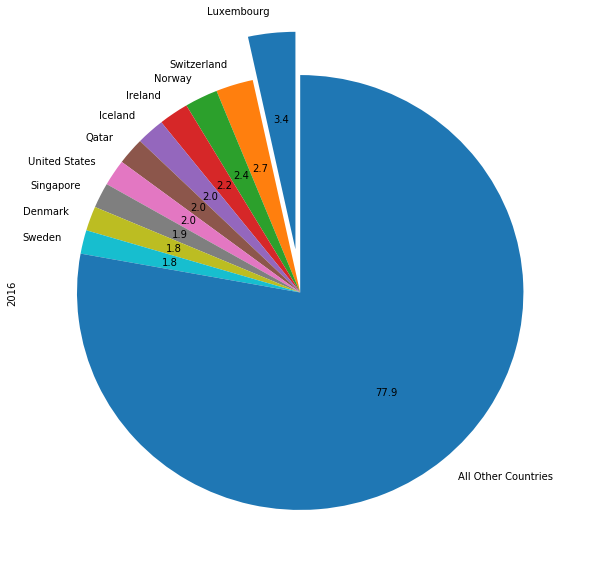

In [16]:
PiePlot('2016')

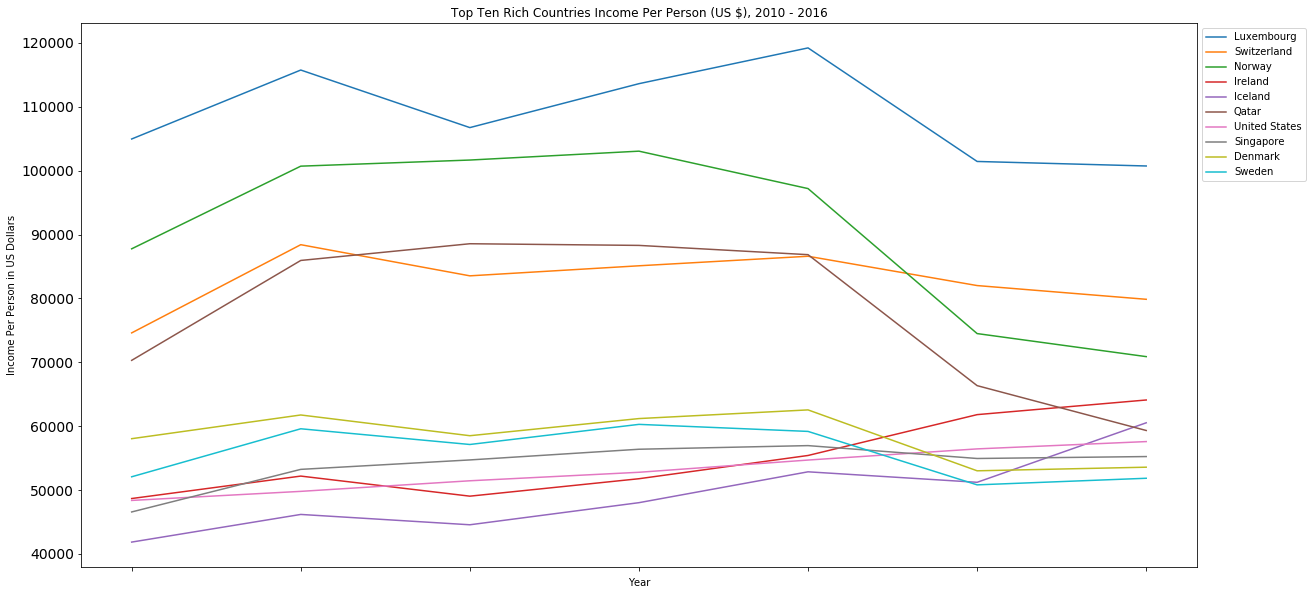

In [17]:
# After figuring out the top 10 richest countries(2016) in terms of GDP Per Capita ($), let's see how those countries
#per person income varied from 2010-2016 by using a time series plot

def TopTenIncomePP(Country):
    IncomePP.loc[Country].plot(legend=True, figsize = (20, 10), fontsize = 14,
                title ='Top Ten Rich Countries Income Per Person (US $), 2010 - 2016')
    plt.legend(bbox_to_anchor=(1.0, 1.0),loc=2)
    plt.xlabel('Year')
    plt.ylabel('Income Per Person in US Dollars')
TopTenIncomePP('Luxembourg')
TopTenIncomePP('Switzerland')
TopTenIncomePP('Norway')
TopTenIncomePP('Ireland')
TopTenIncomePP('Iceland')
TopTenIncomePP('Qatar')
TopTenIncomePP('United States') 
TopTenIncomePP('Singapore')
TopTenIncomePP('Denmark')
TopTenIncomePP('Sweden')
plt.show()


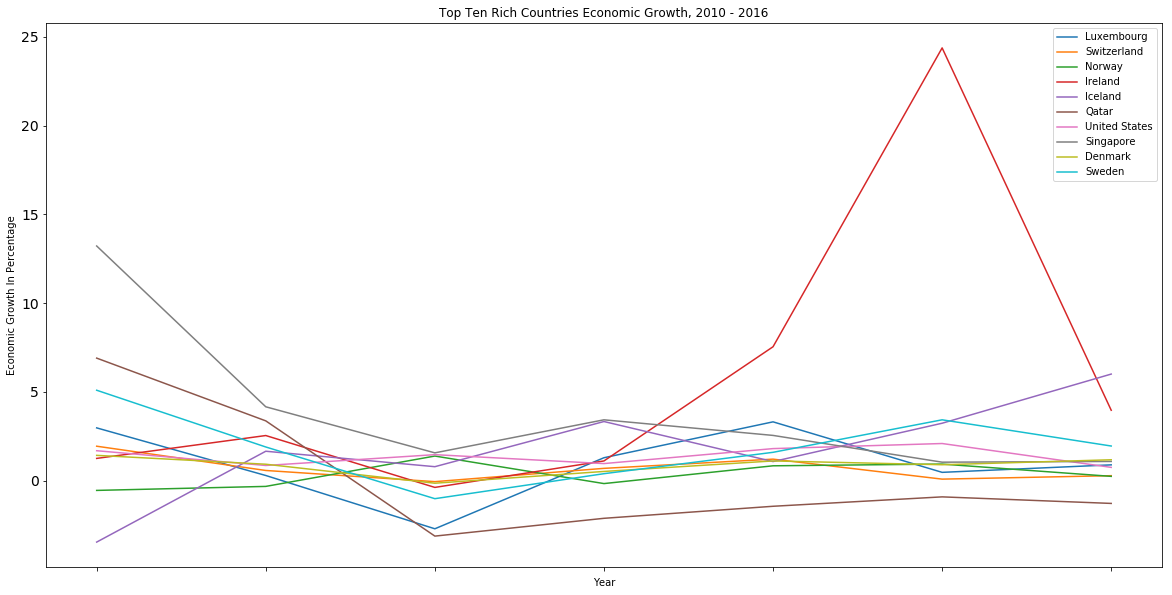

In [18]:
# After figuring out the top 10 richest countries(2016) in terms of GDP Per Capita ($), let's see how those countries
#annual economic growth(%) varied from 2010-2016 by using a time series plot

def TopTenEconomicGrowth(Country):
    EconomicGrowth.loc[Country].plot(legend = True, figsize = (20, 10), fontsize = 14,
                title='Top Ten Rich Countries Economic Growth, 2010 - 2016')
    plt.xlabel('Year')
    plt.ylabel('Economic Growth In Percentage')
TopTenEconomicGrowth('Luxembourg')
TopTenEconomicGrowth('Switzerland')
TopTenEconomicGrowth('Norway')
TopTenEconomicGrowth('Ireland')
TopTenEconomicGrowth('Iceland')
TopTenEconomicGrowth('Qatar')
TopTenEconomicGrowth('United States') 
TopTenEconomicGrowth('Singapore')
TopTenEconomicGrowth('Denmark')
TopTenEconomicGrowth('Sweden')
plt.show()

In [19]:
#Select the GDP per capita of G-20 Nations (except European Union)
IncomePP_G20 = IncomePP.loc[['United States', 'China', 'Russian Federation', 'United Kingdom', 'Japan',  'Australia', 
                      'Canada', 'Germany', 'Italy', 'Argentina', 'France', 'India', 'Korea, Rep.', 'Saudi Arabia'
                             , 'Mexico', 'South Africa', 'Turkey','Indonesia', 'Brazil'], :]
IncomePP_G20

2010          2011          2012          2013  \
Country Name                                                                 
United States       48375.406946  49793.713525  51450.959115  52782.086509   
China                4560.512586   5633.795717   6337.883323   7077.770765   
Russian Federation  10674.987707  14351.212054  15434.574781  16007.089993   
United Kingdom      38893.018494  41412.349240  41790.779141  42724.067884   
Japan               44507.676386  48167.997268  48603.476650  40454.447458   
Australia           51936.888712  62411.785447  67864.689862  67990.290030   
Canada              47447.476024  52082.210760  52496.694870  52418.315062   
Germany             41785.556913  46810.327959  44065.248908  46530.911428   
Italy               35849.373198  38334.683850  34814.125117  35370.275258   
Argentina           10276.260498  12726.908359  12969.707124  12976.636425   
France              40638.334004  43790.735399  40874.715956  42592.951519   
India                1345.770153   1461.671957   1446.985410   1452.195373   
Korea, Rep.         22086.952919  24079.788524  24358.782176  25890.018670   
Saudi Arabia        19259.587257  23770.747386  25303.094621  24934.386142   
Mexico               9016.457812   9912.582043   9940.468822  10400.563108   
South Africa         7275.382112   7976.466077   7478.227665   6822.524760   
Turkey              10672.400162  11340.823620  11720.313865  12542.721529   
Indonesia            3113.480635   3634.276805   3687.953996   3620.663981   
Brazil              11224.154083  13167.472892  12291.466852  12216.904464   

                            2014          2015          2016  
Country Name                                                  
United States       54696.726165  56443.817242  57588.538071  
China                7683.502613   8069.213024   8117.267465  
Russian Federation  14125.908727   9329.290713   8748.368853  
United Kingdom      46783.469217  44305.554632  40412.033620  
Japan               38109.412113  34567.745675  38972.340639  
Australia           62327.555939  56561.412382  49896.681101  
Canada              50633.208822  43525.370187  42348.945461  
Germany             48042.563435  41323.921502  42232.574208  
Italy               35396.665724  30180.321515  30668.981429  
Argentina           12245.256449  13698.293438  12654.354999  
France              43008.652570  36613.375216  36870.219134  
India                1576.004018   1606.038285   1717.473878  
Korea, Rep.         27811.366384  27105.076226  27608.247429  
Saudi Arabia        24575.403038  20732.861722  19982.085631  
Mexico              10580.972472   9290.760629   8443.691924  
South Africa         6433.944544   5746.681127   5280.017633  
Turkey              12127.460722  10984.805202  10862.725380  
Indonesia            3491.595887   3334.549075   3570.284615  
Brazil              12026.619391   8750.222996   8639.365743

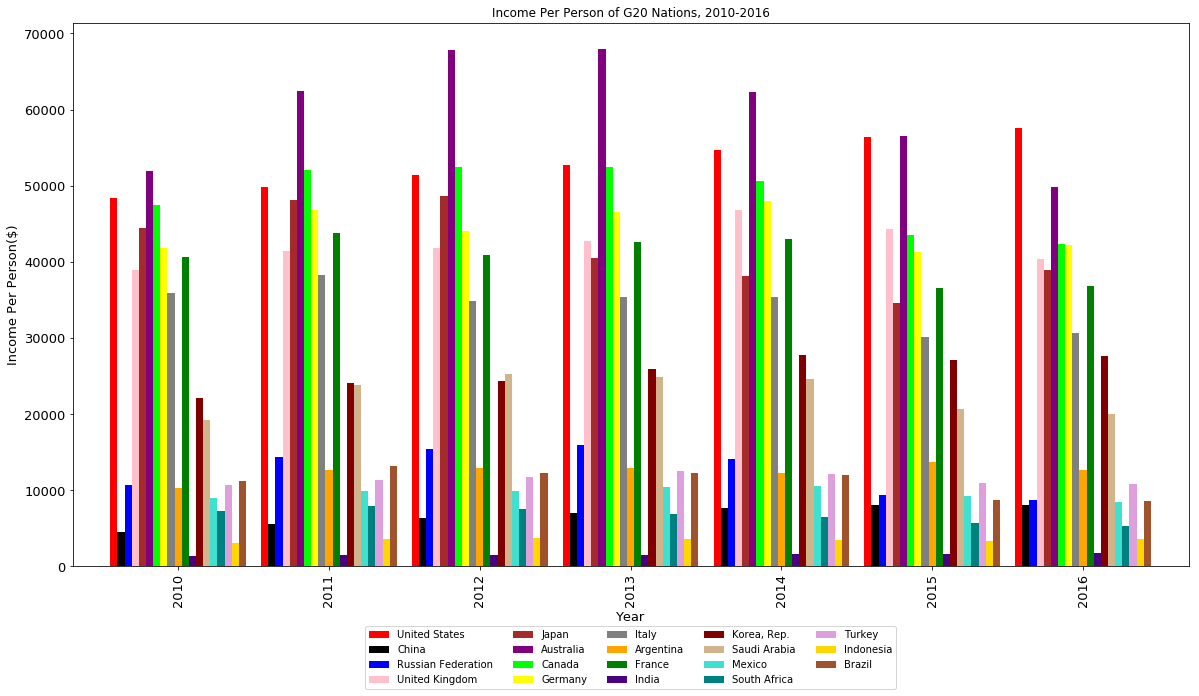

In [20]:
# Create a bar chart to display the Income Per Person of G-20 Nations from 2010 to 2016

colors = ['Red', 'Black', 'Blue', 'Pink', 'Brown', 'Purple','Lime','Yellow', 'Gray',
          'Orange','Green','Indigo','Maroon','Tan','Turquoise','Teal','Plum','Gold','Sienna']      
IncomePP_G20.T.plot( kind ='bar', width = .9, figsize = (20,10), color = colors, fontsize = 13)
plt.legend(loc = 9, bbox_to_anchor = (0.5, -0.1), ncol = 5)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Income Per Person($)', fontsize = 13)
plt.title('Income Per Person of G20 Nations, 2010-2016')
plt.show()

In [21]:
#Select the annual economic growth percentage of  G-20 Nations (except European Union)
EconomicGrowth_G20 = EconomicGrowth.loc[['United States', 'China', 'Russian Federation', 'United Kingdom', 'Japan',  'Australia', 
                      'Canada', 'Germany', 'Italy', 'Argentina', 'France', 'India', 
                      'Korea, Rep.', 'Saudi Arabia', 'Mexico', 'South Africa', 'Turkey',
                'Indonesia', 'Brazil'], :]
EconomicGrowth_G20

2010      2011      2012      2013      2014  \
Country Name                                                            
United States        1.681110  0.849705  1.459290  0.956719  1.800455   
China               10.103101  9.012854  7.332031  7.226936  6.755778   
Russian Federation   4.456827  5.202830  3.481594  1.568860 -1.043023   
United Kingdom       0.900491  0.662683  0.778162  1.371396  2.280809   
Japan                4.173028  0.069763  1.657318  2.147532  0.507999   
Australia            0.477801  1.037364  2.053468  0.850507  0.995200   
Canada               1.941578  2.127592  0.551585  1.303615  1.747224   
Germany              4.239504  5.599481  0.303518  0.215722  1.505653   
Italy                1.374225  0.403802 -3.080604 -2.860800 -0.800673   
Argentina            8.991438  4.902125 -2.060575  1.338453 -3.514196   
France               1.463159  1.586714 -0.301002  0.059831  0.464386   
India                8.763184  5.248537  4.134718  5.096692  6.140334   
Korea, Rep.          5.967519  2.887463  1.756044  2.428867  2.694343   
Saudi Arabia         2.112693  6.832497  2.336999 -0.243798  0.849572   
Mexico               3.493026  2.121358  2.151278 -0.058379  1.449720   
South Africa         1.813629  1.942603  0.796403  1.019058  0.405051   
Turkey               7.005820  9.474948  3.159261  6.748479  3.469272   
Indonesia            4.829440  4.794248  4.677120  4.238373  3.731245   
Brazil               6.503371  2.995902  0.980516  2.069995 -0.379917   

                        2015      2016  
Country Name                            
United States       2.087076  0.742795  
China               6.358383  6.123804  
Russian Federation -3.037567 -0.407586  
United Kingdom      1.535548  1.210531  
Japan               1.461442  1.054627  
Australia           0.863571  1.298225  
Canada              0.163265  0.205759  
Germany             0.866213  1.124030  
Italy               1.049299  1.029750  
Argentina           1.698945 -2.784592  
France              0.646648  0.784469  
India               6.899036  5.889836  
Korea, Rep.         2.249662  2.465813  
Saudi Arabia        1.531812 -0.592818  
Mexico              1.901077  1.582355  
South Africa       -0.097302 -0.734890  
Turkey              4.404098  1.573437  
Indonesia           3.645004  3.845302  
Brazil             -4.368797 -4.254147

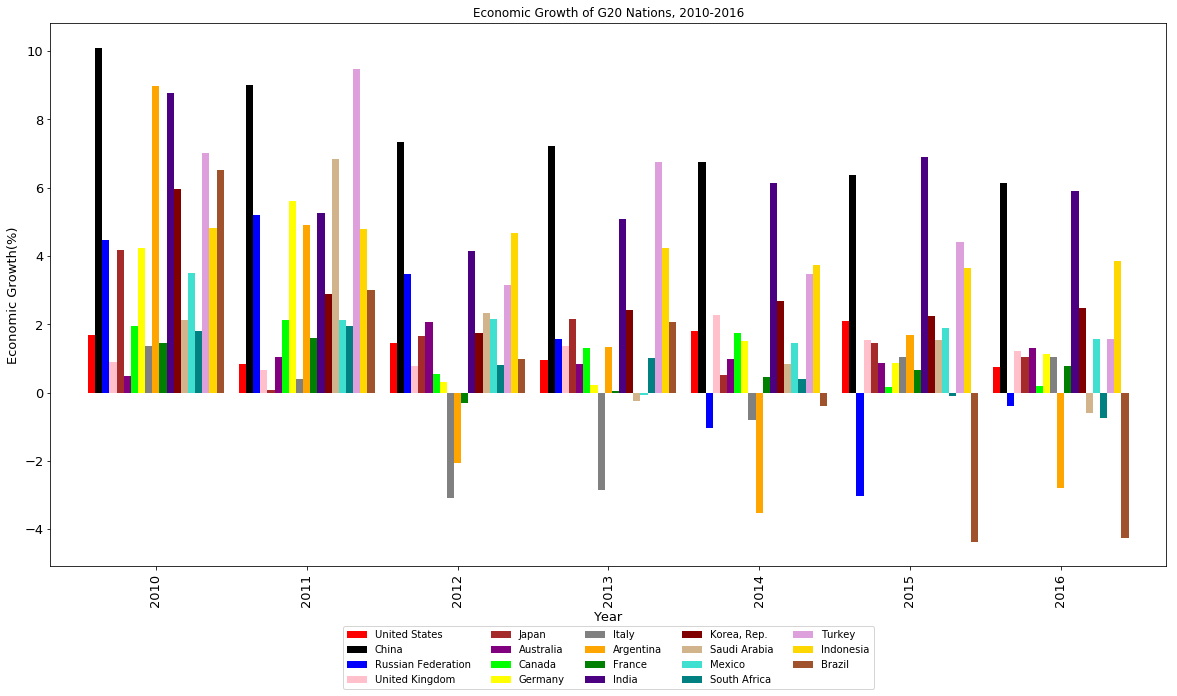

In [22]:
# Create a bar chart to display the Economic Growth of G-20 Nations from 2010 to 2016

colors = ['Red', 'Black', 'Blue', 'Pink', 'Brown', 'Purple','Lime','Yellow', 'Gray',
          'Orange','Green','Indigo','Maroon','Tan','Turquoise','Teal','Plum','Gold','Sienna']      
EconomicGrowth_G20.T.plot(kind = 'bar', width = .9, figsize = (20,10), color = colors, fontsize = 13)
plt.legend(loc = 9, bbox_to_anchor = (0.5, -0.1),ncol = 5)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Economic Growth(%)', fontsize = 13)
plt.title('Economic Growth of G20 Nations, 2010-2016')
plt.show()

In [23]:
#Australia was dominant in terms of Income Per Person (US $) of G20 Nations between 2010 & 2016.
#China was dominant in terms of Economic Growth (%) of G20 Nations between 2010 & 2016. 
#Let'construct a scatter plot to depict the relationship between Income Per Person(US $) & Economic Growth(%)
#for these two countries

IncomePerPerson_Australia = IncomePP_G20.loc['Australia']
IncomePerPerson_China = IncomePP_G20.loc['China']

EconomicGrowth_Australia = EconomicGrowth_G20.loc['Australia']
EconomicGrowth_China = EconomicGrowth_G20.loc['China']


trace1 = go.Scatter(x = IncomePerPerson_Australia.index, y = IncomePerPerson_Australia, 
                    name = 'Income Per Person Australia (US $)')
trace2 = go.Scatter(x = EconomicGrowth_Australia.index, y = EconomicGrowth_Australia,
                    name = 'Economic Growth Australia (%)', yaxis='y2')
trace3 = go.Scatter(x = IncomePerPerson_China.index, y = IncomePerPerson_China, 
                    name = 'Income Per Person China (US $)')
trace4 = go.Scatter(x = EconomicGrowth_China.index, y = EconomicGrowth_China,
                    name = 'Economic Growth China (%)', yaxis='y2')

data = [trace1, trace2, trace3, trace4]
layout = go.Layout(title ='Income Per Person (US $) vs Economic Growth (%) Australia & China', yaxis=dict(
    title = 'Income Per Person (US $)'), yaxis2 = dict(title='Economic Growth (%)', 
                                                       titlefont = dict(color ='rgb(148, 103, 189)'),
                                                       tickfont = dict(color ='rgb(148, 103, 189)'),
                                                       overlaying ='y', side ='right'))
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, validate=False, filename = 'China & Australia Income Per Person & Economic Growth Comparison')

In [24]:
# Income Per Person difference between 2010 and 2016
IncomePP_G20['Difference 2016-2010'] = IncomePP_G20['2016'] - IncomePP_G20['2010']
IncomePP_G20

2010          2011          2012          2013  \
Country Name                                                                 
United States       48375.406946  49793.713525  51450.959115  52782.086509   
China                4560.512586   5633.795717   6337.883323   7077.770765   
Russian Federation  10674.987707  14351.212054  15434.574781  16007.089993   
United Kingdom      38893.018494  41412.349240  41790.779141  42724.067884   
Japan               44507.676386  48167.997268  48603.476650  40454.447458   
Australia           51936.888712  62411.785447  67864.689862  67990.290030   
Canada              47447.476024  52082.210760  52496.694870  52418.315062   
Germany             41785.556913  46810.327959  44065.248908  46530.911428   
Italy               35849.373198  38334.683850  34814.125117  35370.275258   
Argentina           10276.260498  12726.908359  12969.707124  12976.636425   
France              40638.334004  43790.735399  40874.715956  42592.951519   
India                1345.770153   1461.671957   1446.985410   1452.195373   
Korea, Rep.         22086.952919  24079.788524  24358.782176  25890.018670   
Saudi Arabia        19259.587257  23770.747386  25303.094621  24934.386142   
Mexico               9016.457812   9912.582043   9940.468822  10400.563108   
South Africa         7275.382112   7976.466077   7478.227665   6822.524760   
Turkey              10672.400162  11340.823620  11720.313865  12542.721529   
Indonesia            3113.480635   3634.276805   3687.953996   3620.663981   
Brazil              11224.154083  13167.472892  12291.466852  12216.904464   

                            2014          2015          2016  \
Country Name                                                   
United States       54696.726165  56443.817242  57588.538071   
China                7683.502613   8069.213024   8117.267465   
Russian Federation  14125.908727   9329.290713   8748.368853   
United Kingdom      46783.469217  44305.554632  40412.033620   
Japan               38109.412113  34567.745675  38972.340639   
Australia           62327.555939  56561.412382  49896.681101   
Canada              50633.208822  43525.370187  42348.945461   
Germany             48042.563435  41323.921502  42232.574208   
Italy               35396.665724  30180.321515  30668.981429   
Argentina           12245.256449  13698.293438  12654.354999   
France              43008.652570  36613.375216  36870.219134   
India                1576.004018   1606.038285   1717.473878   
Korea, Rep.         27811.366384  27105.076226  27608.247429   
Saudi Arabia        24575.403038  20732.861722  19982.085631   
Mexico              10580.972472   9290.760629   8443.691924   
South Africa         6433.944544   5746.681127   5280.017633   
Turkey              12127.460722  10984.805202  10862.725380   
Indonesia            3491.595887   3334.549075   3570.284615   
Brazil              12026.619391   8750.222996   8639.365743   

                    Difference 2016-2010  
Country Name                              
United States                9213.131124  
China                        3556.754879  
Russian Federation          -1926.618855  
United Kingdom               1519.015126  
Japan                       -5535.335747  
Australia                   -2040.207611  
Canada                      -5098.530564  
Germany                       447.017296  
Italy                       -5180.391769  
Argentina                    2378.094501  
France                      -3768.114870  
India                         371.703725  
Korea, Rep.                  5521.294509  
Saudi Arabia                  722.498375  
Mexico                       -572.765888  
South Africa                -1995.364479  
Turkey                        190.325218  
Indonesia                     456.803980  
Brazil                      -2584.788339

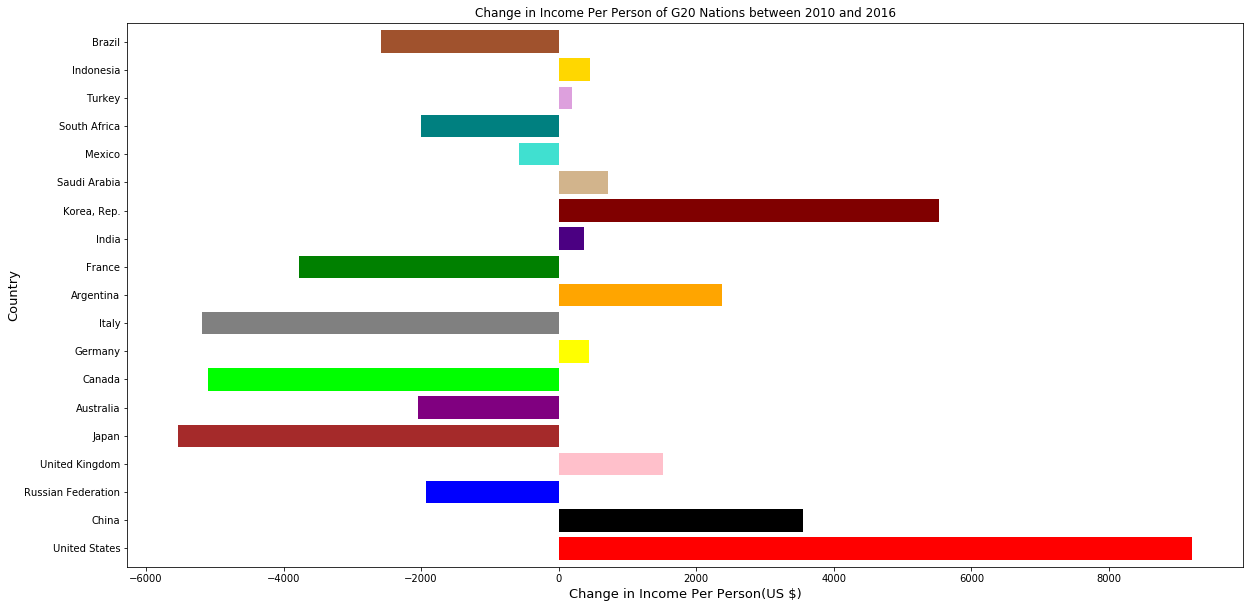

In [25]:
# Create a bar chart to display the change in income per person of each country between 2010 and 2016
IncomePP_G20['Difference 2016-2010'].plot(kind = 'barh', figsize=(20,10), width = 0.8, color = colors)
plt.xlabel('Change in Income Per Person(US $)', fontsize = 13)                             
plt.ylabel('Country', fontsize = 13)
plt.title('Change in Income Per Person of G20 Nations between 2010 and 2016')
plt.show()

In [26]:
# Economic Growth difference between 2010 and 2016
EconomicGrowth_G20['Difference 2016-2010'] = EconomicGrowth_G20['2016']- EconomicGrowth_G20['2010']
EconomicGrowth_G20

2010      2011      2012      2013      2014  \
Country Name                                                            
United States        1.681110  0.849705  1.459290  0.956719  1.800455   
China               10.103101  9.012854  7.332031  7.226936  6.755778   
Russian Federation   4.456827  5.202830  3.481594  1.568860 -1.043023   
United Kingdom       0.900491  0.662683  0.778162  1.371396  2.280809   
Japan                4.173028  0.069763  1.657318  2.147532  0.507999   
Australia            0.477801  1.037364  2.053468  0.850507  0.995200   
Canada               1.941578  2.127592  0.551585  1.303615  1.747224   
Germany              4.239504  5.599481  0.303518  0.215722  1.505653   
Italy                1.374225  0.403802 -3.080604 -2.860800 -0.800673   
Argentina            8.991438  4.902125 -2.060575  1.338453 -3.514196   
France               1.463159  1.586714 -0.301002  0.059831  0.464386   
India                8.763184  5.248537  4.134718  5.096692  6.140334   
Korea, Rep.          5.967519  2.887463  1.756044  2.428867  2.694343   
Saudi Arabia         2.112693  6.832497  2.336999 -0.243798  0.849572   
Mexico               3.493026  2.121358  2.151278 -0.058379  1.449720   
South Africa         1.813629  1.942603  0.796403  1.019058  0.405051   
Turkey               7.005820  9.474948  3.159261  6.748479  3.469272   
Indonesia            4.829440  4.794248  4.677120  4.238373  3.731245   
Brazil               6.503371  2.995902  0.980516  2.069995 -0.379917   

                        2015      2016  Difference 2016-2010  
Country Name                                                  
United States       2.087076  0.742795             -0.938316  
China               6.358383  6.123804             -3.979297  
Russian Federation -3.037567 -0.407586             -4.864413  
United Kingdom      1.535548  1.210531              0.310039  
Japan               1.461442  1.054627             -3.118401  
Australia           0.863571  1.298225              0.820423  
Canada              0.163265  0.205759             -1.735819  
Germany             0.866213  1.124030             -3.115474  
Italy               1.049299  1.029750             -0.344475  
Argentina           1.698945 -2.784592            -11.776030  
France              0.646648  0.784469             -0.678690  
India               6.899036  5.889836             -2.873348  
Korea, Rep.         2.249662  2.465813             -3.501706  
Saudi Arabia        1.531812 -0.592818             -2.705510  
Mexico              1.901077  1.582355             -1.910671  
South Africa       -0.097302 -0.734890             -2.548518  
Turkey              4.404098  1.573437             -5.432383  
Indonesia           3.645004  3.845302             -0.984138  
Brazil             -4.368797 -4.254147            -10.757518

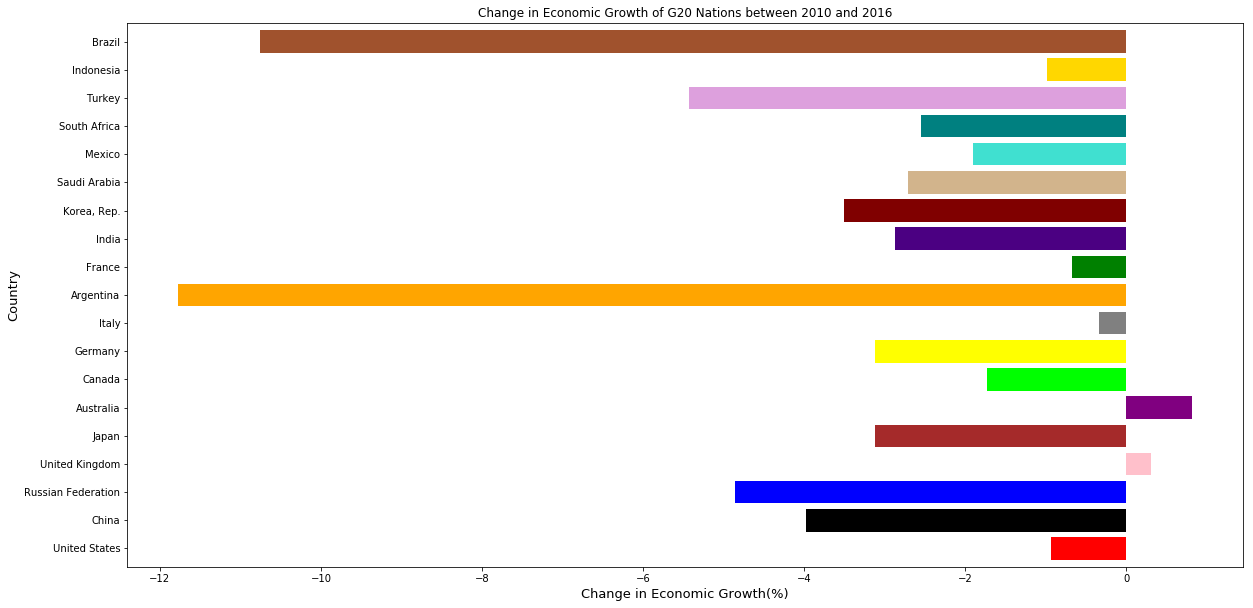

In [27]:
# Create a bar chart to display the change in economic growth of each country between 2010 and 2016
EconomicGrowth_G20['Difference 2016-2010'].plot(kind = 'barh', figsize=(20,10), width = 0.8, color = colors)
plt.xlabel('Change in Economic Growth(%)', fontsize = 13)                             
plt.ylabel('Country', fontsize = 13)
plt.title('Change in Economic Growth of G20 Nations between 2010 and 2016')
plt.show()

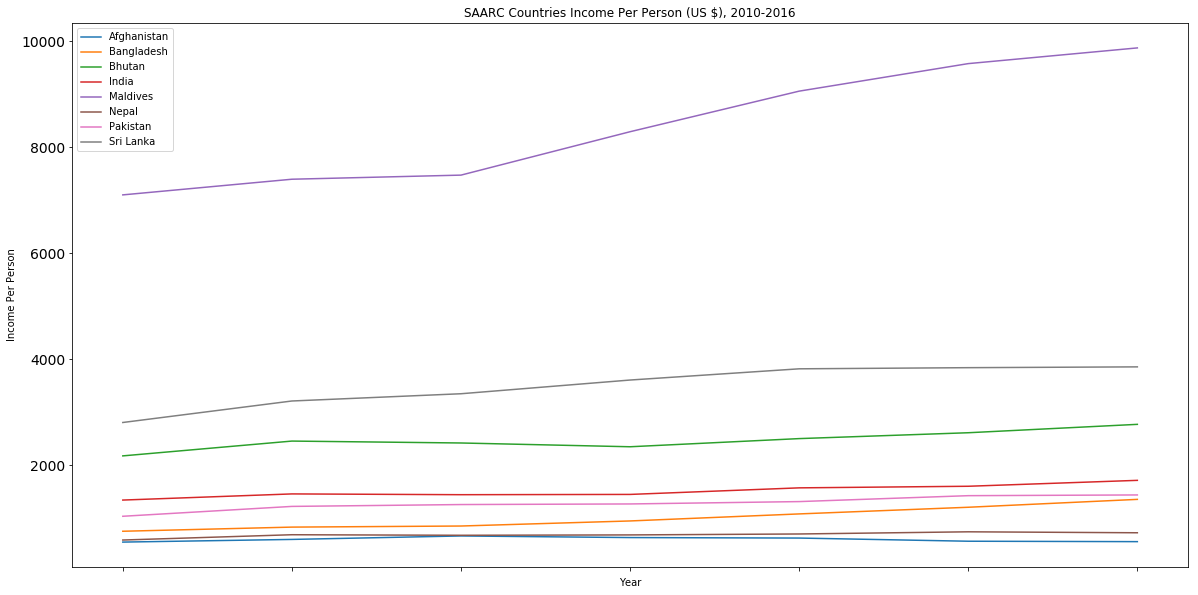

In [28]:
#Let's see how SAARC nations(Afghanistan, Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan & Sri Lanka)
#are doing in terms of Income Per Person(US $) throughout the years, 2010-2016
def SAARC_IPP(Country):
    IncomePP.loc[Country].plot(legend = True, figsize = (20, 10), fontsize = 14,
                title = 'SAARC Countries Income Per Person (US $), 2010-2016')
    plt.xlabel('Year')
    plt.ylabel('Income Per Person')
SAARC_IPP('Afghanistan')
SAARC_IPP('Bangladesh')
SAARC_IPP('Bhutan')
SAARC_IPP('India')
SAARC_IPP('Maldives')
SAARC_IPP('Nepal')
SAARC_IPP('Pakistan')
SAARC_IPP('Sri Lanka')
plt.show()

In [29]:
#Maldives is way above in the spectrum. Let's locate Maldives from the Income Per Person dataset and look at it's
#Income Per Person numbers from 2010-2016
MaldivesIncomePP = IncomePP.loc['Maldives']
MaldivesIncomePP

2010    7100.405899
2011    7395.687800
2012    7473.195629
2013    8291.485295
2014    9056.653440
2015    9575.770700
2016    9871.906911
Name: Maldives, dtype: float64

In [34]:
PakistanIncomePP = IncomePP.loc['Pakistan']
PakistanIncomePP 

2010    1040.142268
2011    1226.215314
2012    1261.208967
2013    1272.441061
2014    1316.980966
2015    1428.637628
2016    1442.285840
Name: Pakistan, dtype: float64

In [35]:
PakistanEconomicGrowth = EconomicGrowth.loc['Pakistan']
PakistanEconomicGrowth

2010   -0.484656
2011    0.610616
2012    1.338549
2013    2.212693
2014    2.511973
2015    2.610729
2016    3.438653
Name: Pakistan, dtype: float64

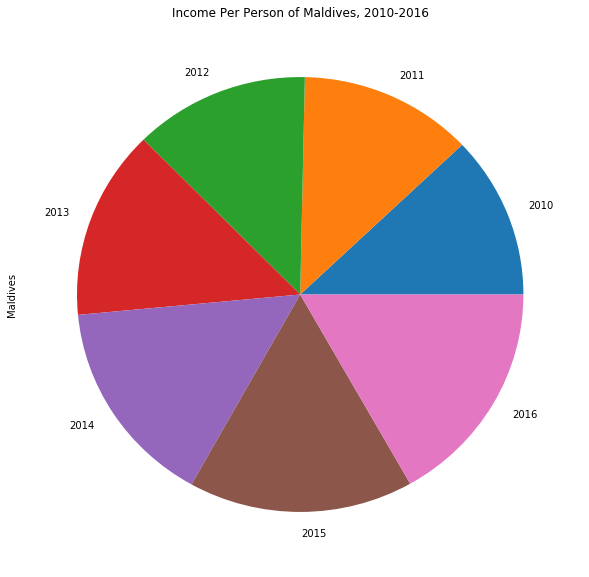

In [30]:
#Using a piechart to display Maldives Income Per Person, 2010-2016
MaldivesIncomePP_Plot = MaldivesIncomePP.plot.pie(figsize = (10,10),
                                                  title = 'Income Per Person of Maldives, 2010-2016')
plt.show()

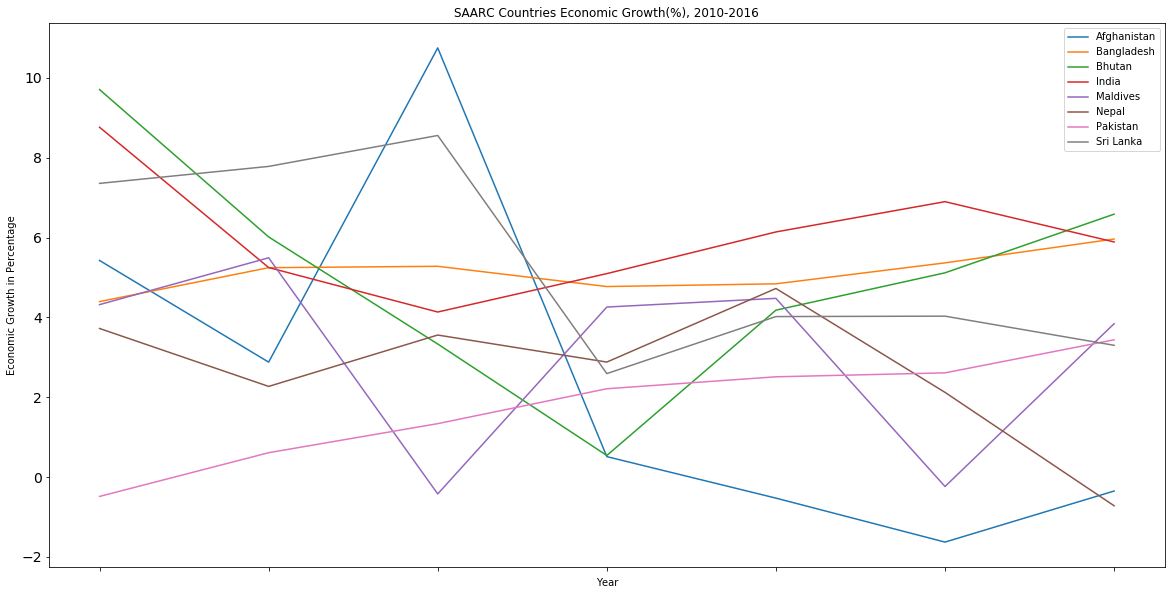

In [31]:
#Let's see how SAARC nations(Afghanistan, Bangladesh, Bhutan, India, Maldives, Nepal, Pakistan & Sri Lanka)
#are doing in terms of Annual Economic Growth(%) throughout the years, 2010-2016
def SAARC_EG(Country):
    EconomicGrowth.loc[Country].plot(legend = True, figsize = (20, 10), fontsize = 14,
                title = 'SAARC Countries Economic Growth(%), 2010-2016')
    plt.xlabel('Year')
    plt.ylabel('Economic Growth in Percentage')
SAARC_EG('Afghanistan')
SAARC_EG('Bangladesh')
SAARC_EG('Bhutan')
SAARC_EG('India')
SAARC_EG('Maldives')
SAARC_EG('Nepal')
SAARC_EG('Pakistan')
SAARC_EG('Sri Lanka')
plt.show()

In [32]:
#Pakistan is the only SAARC nation which has been consistent in annual economic growth

#Let's locate Maldives which has the highest per person income among the SAARC countries from the
#Economic Growth dataset and look at it's Economic Growth change between 2010-2016
MaldivesEconomicGrowth = EconomicGrowth.loc['Maldives']
MaldivesEconomicGrowth

2010    4.319473
2011    5.493197
2012   -0.421673
2013    4.259148
2014    4.477102
2015   -0.235916
2016    3.841872
Name: Maldives, dtype: float64

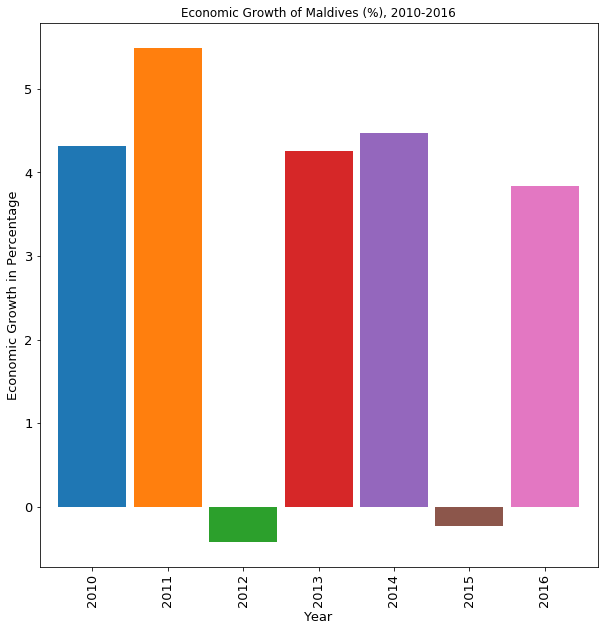

In [33]:
#Since there were some negative percentage values, it was not possible to use a piechart to display the above 
#result, hence a bar chart was employed
MaldivesEconomicGrowth_Plot = MaldivesEconomicGrowth.plot(kind = 'bar', width= .9, figsize = (10,10),
                                                          fontsize = 13)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Economic Growth in Percentage', fontsize = 13)

plt.title('Economic Growth of Maldives (%), 2010-2016')
plt.show()